In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
import itertools
import numpy as np

Using TensorFlow backend.


In [2]:
x = np.load("x.npy")
y = np.load("y.npy")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

In [4]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

305
102
305
102


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(305, 224, 224, 3)
(102, 224, 224, 3)
(305,)
(102,)


In [6]:
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes = 2)
y_test_oh = to_categorical(y_test, num_classes = 2)

In [7]:
print(y_train_oh.shape)
print(y_test_oh.shape)

(305, 2)
(102, 2)


In [8]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [9]:
batch_size = 16
epochs = 20
num_classes = 2

In [10]:
    img_rows, img_cols = x_train.shape[1],x_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    print("Input shape is",input_shape)
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     kernel_initializer='he_normal',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
        
    optimizer = SGD(lr=0.00000000001)

    model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])
    print("done")

Input shape is (224, 224, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128

In [11]:
history = model.fit(x_train, y_train_oh, batch_size=batch_size,epochs=epochs
                            ,verbose=1,validation_data=(x_test, y_test_oh))

Train on 305 samples, validate on 102 samples
Epoch 1/20
305/305 [==============================] - 6s 19ms/step - loss: 7.6253 - acc: 0.5148 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/20
305/305 [==============================] - 1s 4ms/step - loss: 8.0685 - acc: 0.4951 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/20
305/305 [==============================] - 1s 4ms/step - loss: 7.8936 - acc: 0.4984 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/20
305/305 [==============================] - 1s 4ms/step - loss: 7.8086 - acc: 0.5082 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/20
305/305 [==============================] - 1s 4ms/step - loss: 7.9114 - acc: 0.4951 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 6/20
305/305 [==============================] - 1s 4ms/step - loss: 8.1072 - acc: 0.4885 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 7/20
305/305 [==============================] - 1s 4ms/step - loss: 7.7921 - acc: 0.5082 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 8/20
305/305 [=========

In [12]:
test_eval = model.evaluate(x_test,y_test_oh,verbose = 1)

102/102 [==============================] - 0s 2ms/step


Test loss: 8.01511955261
Test accuracy: 0.5


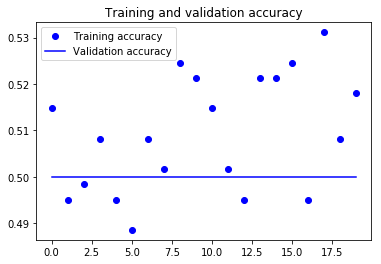

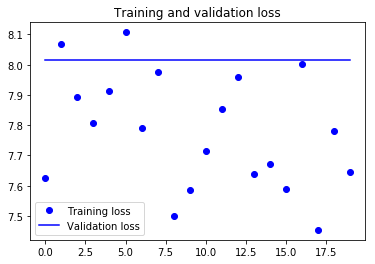

In [13]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [14]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1) 
